In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv(r"/home/zsj/code/CSE587-Project-UsedCarPricePrediction/carinfo_after_pre_clean.csv")
df.head()

,Unnamed: 0,year,make,model,price,mileage,Miles per gallon,Transmission,owner,VIN,...,cylinders,fuel,Drive type,Miles per gallon equivalent (MPGe),Range (when new),Time to fully charge battery (240V),Motor,Bed Length,exterior_color,interior_color
0,0,2015,Subaru,Outback Limited,16998,92000,25 city/32 hwy,Automatic,2.0,4S4BSANC4F3279791,...,NaN,NaN,NaN,NaN,NaN,NaN,non-electric,NaN,Silver,Black
1,1,2017,Subaru,Forester 2.5I,16998,79000,22 city/28 hwy,Manual 6 Speed,1.0,JF2SJAACXHG452398,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Silver,Gray
2,2,2020,Subaru,Impreza,18998,43000,28 city/36 hwy,Automatic,1.0,4S3GKAB64L3608865,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Blue,Black
3,3,2016,Subaru,Legacy 2.5I,14998,91000,26 city/36 hwy,Automatic,3.0,4S3BNAA63G3004121,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Gray,Black
4,4,2021,Subaru,Crosstrek Premium,24998,53000,28 city/33 hwy,Automatic,1.0,JF2GTAEC8MH670080,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Black,Black


**Data Cleaning for attributes: Accident / Damage, make, mileage, price**

In [2]:
df.columns.tolist()

['Unnamed: 0',
 'year',
 'make',
 'model',
 'price',
 'mileage',
 'Miles per gallon',
 'Transmission',
 'owner',
 'VIN',
 'class',
 'Auction Brand / Issues',
 'Accident / Damage',
 'Open Recall Check',
 'Odometer Check',
 'Certified Pre-Owned',
 'cylinders',
 'fuel',
 'Drive type',
 'Miles per gallon equivalent (MPGe)',
 'Range (when new)',
 'Time to fully charge battery (240V)',
 'Motor',
 'Bed Length',
 'exterior_color',
 'interior_color']

In [3]:
df_dmg=df.dropna(subset=['mileage','make','price','Accident / Damage']) # drop rows with NaN values in mileage, price or make
df_dmg = df_dmg[df_dmg['price']!=0] # drop rows with price equals to 0

In [4]:
average_price_by_make = df_dmg.groupby('make')['price'].mean()
lowest_ten_makes = average_price_by_make.sort_values().head(10)
highest_five_makes = average_price_by_make.sort_values(ascending=False).head(5)


In [5]:
lowest_ten_makes

make
Hyundai       19954.468672
Mitsubishi    20048.484252
Buick         20720.965368
Mini          21246.323276
Nissan        22001.951100
Volkswagen    22651.104938
Mazda         22927.378917
Kia           22931.190981
Subaru        23680.248148
Ford          24181.816742
Name: price, dtype: float64

In [6]:
highest_five_makes

make
Porsche    45998.000000
Land       39102.956268
Lexus      35798.000000
Ram        35472.193548
Tesla      33868.689655
Name: price, dtype: float64

In [6]:
expensive_car_data = df_dmg.loc[df_dmg['make'].isin(highest_five_makes.index.tolist())]
cheap_car_data = df_dmg.loc[df_dmg['make'].isin(lowest_ten_makes.index.tolist())]

In [7]:
expensive_clean_car_data = expensive_car_data.loc[expensive_car_data['Accident / Damage'].isin(['No Issue'])]
expensive_minor_data = expensive_car_data.loc[expensive_car_data['Accident / Damage'].isin(['Minor', 'Very Minor'])]
expensive_moderate_data = expensive_car_data.loc[expensive_car_data['Accident / Damage'].isin(['Moderate', 'Minor-Moderate','Moderate-Severe'])]
expensive_damage_reported_data = expensive_car_data.loc[expensive_car_data['Accident / Damage'].isin(['Damage Reported'])]

cheap_clean_car_data = cheap_car_data.loc[cheap_car_data['Accident / Damage'].isin(['No Issue'])]
cheap_minor_data = cheap_car_data.loc[cheap_car_data['Accident / Damage'].isin(['Minor', 'Very Minor'])]
cheap_moderate_data = cheap_car_data.loc[cheap_car_data['Accident / Damage'].isin(['Moderate', 'Minor-Moderate','Moderate-Severe'])]
cheap_damage_reported_data = cheap_car_data.loc[cheap_car_data['Accident / Damage'].isin(['Damage Reported'])]

# Question 8:  For used cars with different makes, will the accident record affect the used cars’ price differently? (Shijie)

**Hypothesis 1: the used cars with different makes share the similar pattern between mileage and price.**  

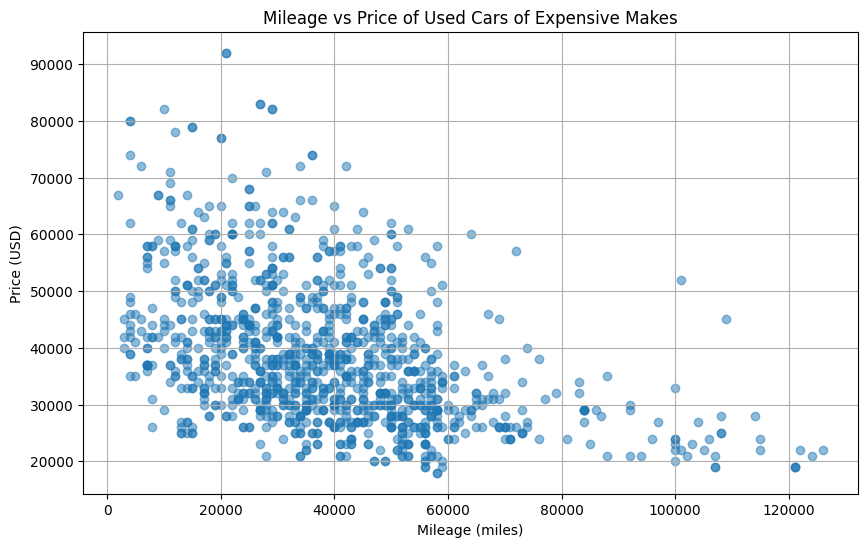

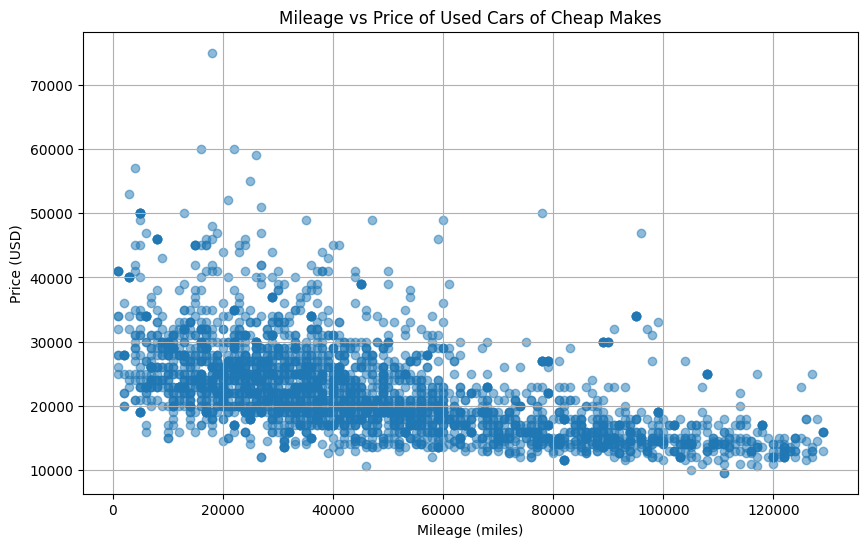

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(expensive_car_data['mileage'],expensive_car_data['price'],alpha=0.5)
plt.title('Mileage vs Price of Used Cars of Expensive Makes')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(cheap_car_data['mileage'],cheap_car_data['price'],alpha=0.5)
plt.title('Mileage vs Price of Used Cars of Cheap Makes')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [9]:
mileage_corr_expensive=expensive_car_data['mileage'].corr(expensive_car_data['price'])
mileage_corr_cheap=cheap_car_data['mileage'].corr(cheap_car_data['price'])
print('Pearson correlation of used car of expensive makes:', mileage_corr_expensive)
print('Pearson correlation of used car of cheap makes:',mileage_corr_cheap)

Pearson correlation of used car of expensive makes: -0.4487958243732463
Pearson correlation of used car of cheap makes: -0.5643709389958534


From both plots and Pearson correlation values of used cars with different price level makes share the smilar pattern between mileage and price.

**Hypothesis 2: Used cars with different brand will have different sensitivity on price towards the accident/damage record.**

In [10]:
from sklearn.linear_model import LinearRegression
no_dmg_model_expensive = LinearRegression()
no_dmg_model_expensive.fit(expensive_clean_car_data['mileage'].to_numpy().reshape(-1, 1), expensive_clean_car_data['price'].to_numpy().reshape(-1, 1))
dmg_model_expensive = LinearRegression()
dmg_model_expensive.fit(expensive_damage_reported_data['mileage'].to_numpy().reshape(-1, 1), expensive_damage_reported_data['price'].to_numpy().reshape(-1, 1))

no_dmg_model_cheap = LinearRegression()
no_dmg_model_cheap.fit(cheap_clean_car_data['mileage'].to_numpy().reshape(-1, 1), cheap_clean_car_data['price'].to_numpy().reshape(-1, 1))
dmg_model_cheap = LinearRegression()
dmg_model_cheap.fit(cheap_damage_reported_data['mileage'].to_numpy().reshape(-1, 1), cheap_damage_reported_data['price'].to_numpy().reshape(-1, 1))

LinearRegression()

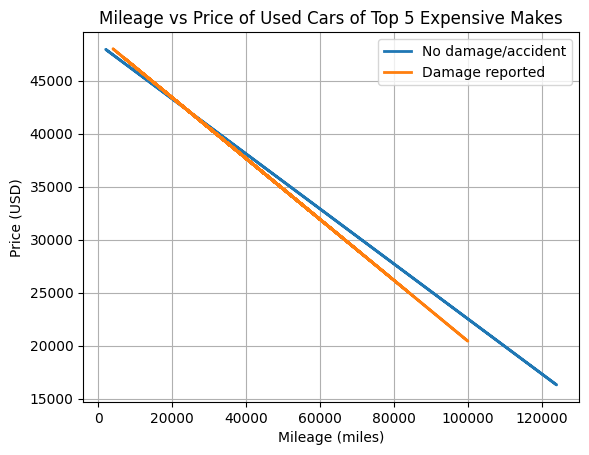

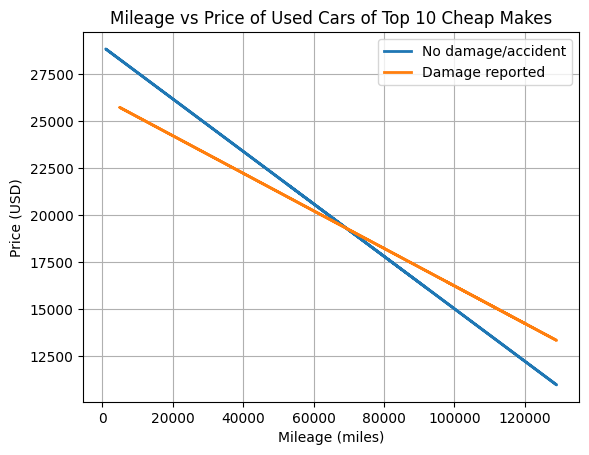

In [17]:

plt.plot(expensive_clean_car_data['mileage'], no_dmg_model_expensive.predict(expensive_clean_car_data['mileage'].to_numpy().reshape(-1, 1)), linewidth=2, label='No damage/accident')
plt.plot(expensive_damage_reported_data['mileage'], dmg_model_expensive.predict(expensive_damage_reported_data['mileage'].to_numpy().reshape(-1, 1)), linewidth=2, label='Damage reported')
plt.title('Mileage vs Price of Used Cars of Top 5 Expensive Makes')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(cheap_clean_car_data['mileage'], no_dmg_model_cheap.predict(cheap_clean_car_data['mileage'].to_numpy().reshape(-1, 1)), linewidth=2, label='No damage/accident')
plt.plot(cheap_damage_reported_data['mileage'], dmg_model_cheap.predict(cheap_damage_reported_data['mileage'].to_numpy().reshape(-1, 1)), linewidth=2, label='Damage reported')
plt.title('Mileage vs Price of Used Cars of Top 10 Cheap Makes')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
count_less_than_70000 = (expensive_clean_car_data['mileage'] < 80000).sum()
count_greater_than_70000 = (expensive_clean_car_data['mileage'] > 80000).sum()
print(count_less_than_70000,count_greater_than_70000)

886 30


In [16]:
count_less_than_70000 = (cheap_damage_reported_data['mileage'] < 80000).sum()
count_greater_than_70000 = (cheap_damage_reported_data['mileage'] > 80000).sum()
print(count_less_than_70000,count_greater_than_70000)

228 77


Most used cars on sale have mileage smaller than 80000. Thus we focus on this range.

We can observe that used cars with cheap auto makes are more sensitive with whether the used cars have been through accidents (the used car with accident reported has much less price.) But for used cars of expensive makes, the affect from accidents is much more slight. It verifies our Hypothesis 2. 